In [1]:
%pylab inline
import pandas as pd
dfr = pd.read_csv('../datasets/loanf.csv')
# inspect, sanity check
dfr.head()

Populating the interactive namespace from numpy and matplotlib


,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [2]:
# we add a column which indicates (True/False) whether the interest rate is <= 12 
dfr['TF']=dfr['Interest.Rate']<=12
# inspect again
dfr.head()
# we see that the TF values are False as Interest.Rate is higher than 12 in all these cases

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
6,15.31,670,36,4891.67,6000,False
11,19.72,670,36,3575.00,2000,False
12,14.27,665,36,4250.00,10625,False
13,21.67,670,60,14166.67,28000,False
21,21.98,665,36,6666.67,22000,False


In [3]:
# now we check the rows that have interest rate == 10 (just some number < 12)
# this is just to confirm that the TF value is True where we expect it to be
d = dfr[dfr['Interest.Rate']==10]
d.head()
# all is well

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount,TF
650,10,700,36,3250.00,2800,True
204,10,715,36,15416.67,6000,True
440,10,730,36,6250.00,21000,True
521,10,715,36,5000.00,12000,True
1017,10,735,60,4000.00,5000,True


In [4]:
import statsmodels.api as sm
# statsmodels requires us to add a constant column representing the intercept
dfr['intercept']=1.0
# identify the independent variables 
ind_cols=['FICO.Score','Loan.Amount','intercept']
logit = sm.Logit(dfr['TF'], dfr[ind_cols])
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8


In [5]:
# get the fitted coefficients from the results
coeff = result.params
print(coeff)

FICO.Score      0.087423
Loan.Amount    -0.000174
intercept     -60.125045
dtype: float64


In [6]:
def pz(fico,amt,coeff):
    # compute the linear expression by multipyling the inputs by their respective coefficients.
    # note that the coefficient array has the intercept coefficient at the end
    z = coeff[0]*fico + coeff[1]*amt + coeff[2]
    return 1/(1+exp(-1*z))

In [7]:
pz(720,10000,coeff)

0.74637858895151077

In [8]:
print("Trying multiple FICO Loan Amount combinations: ")
print('----')
print("fico=720, amt=10,000")
print(pz(720,10000,coeff))
print("fico=720, amt=20,000")
print(pz(720,20000,coeff))
print("fico=720, amt=30,000")
print(pz(720,30000,coeff))
print("fico=820, amt=10,000")
print(pz(820,10000,coeff))
print("fico=820, amt=20,000")
print(pz(820,20000,coeff))
print("fico=820, amt=30,000")
print(pz(820,30000,coeff))


Trying multiple FICO Loan Amount combinations: 
----
fico=720, amt=10,000
0.746378588952
fico=720, amt=20,000
0.340539857688
fico=720, amt=30,000
0.083083595237
fico=820, amt=10,000
0.999945742327
fico=820, amt=20,000
0.999690867752
fico=820, amt=30,000
0.998240830138


In [9]:
pz(820,63000,coeff)

0.64525116319288345

In [10]:
print("Trying multiple FICO Loan Amount combinations: ")
print('----')
print("fico=820, amt=50,000")
print(pz(820,50000,coeff))
print("fico=820, amt=60,000")
print(pz(820,60000,coeff))
print("fico=820, amt=70,000")
print(pz(820,70000,coeff))
print("fico=820, amt=63,000")
print(pz(820,63000,coeff))
print("fico=820, amt=65,000")
print(pz(820,65000,coeff))
print("fico=820, amt=67,000")
print(pz(820,67000,coeff))

Trying multiple FICO Loan Amount combinations: 
----
fico=820, amt=50,000
0.945863681761
fico=820, amt=60,000
0.754046864085
fico=820, amt=70,000
0.349789145957
fico=820, amt=63,000
0.645251163193
fico=820, amt=65,000
0.562219246329
fico=820, amt=67,000
0.475548952428


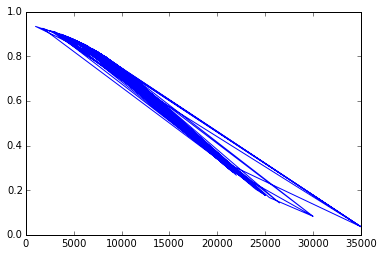

In [34]:
import matplotlib.pyplot as plt
loans = dfr[dfr['FICO.Score'] == 720]
x = loans['Loan.Amount']
y = pz(720,x,coeff)
plt.plot(x,y)

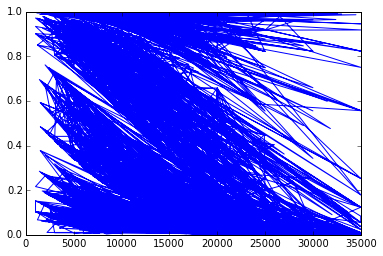

In [35]:
z = dfr['FICO.Score']
x = dfr['Loan.Amount']
y = pz(z,x,coeff)
plt.plot(x,y)